# Imports

In [1]:
import pandas as pd
import os
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200
import matplotlib.pyplot as plt

mpl.style.use('seaborn')
import seaborn as sns
import numpy as np

from data_loader_and_preprocessing import *
from exploratory_data_analysis import *
from data_modeler import *

# Idea

 We want to predict the date of the next visit of a given customer, so from the following table, we need to extract, for a given line, the label which consist of the date of the next visit. We can represent this date as gap between the last and the next sale

# Loading data

In [2]:
data_path = '../Data'
filename = 'cereals_juice.csv'
training_table = pd.read_csv(os.path.join(data_path, filename), sep = ',')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# First EDA on the raw data

In [3]:
continuous_features = []
categorical_features = ['category', 'quantity', 'format', 'pack', 'discount', 'original_format']
id_features = ['customer', 'product']
eda = EDA(training_table, continuous_features, categorical_features, id_features )

EDA plotter initialized


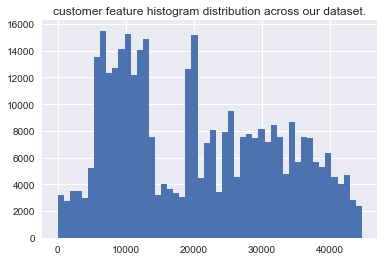

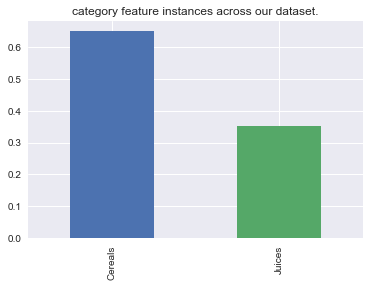

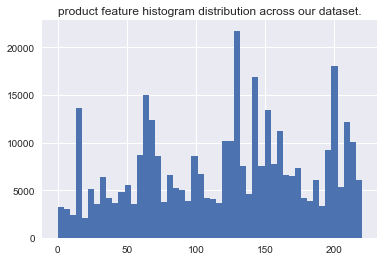

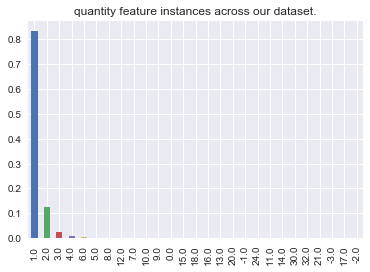

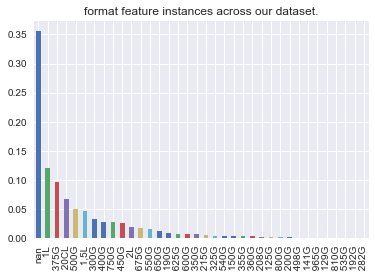

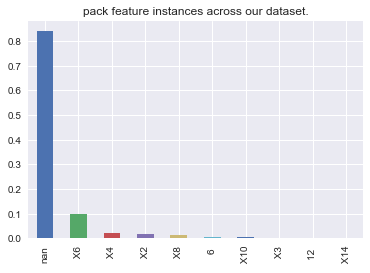

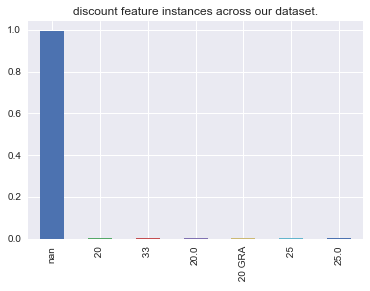

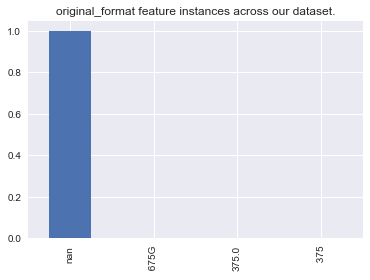

In [4]:
for feature in training_table.columns:
    if feature != 'datetime':
        eda.plot_feature_instances(feature)

 # Raw data to labeled data  (do not run : time-consuming : I haved saved an intermerdiate file 

Extraction of the next date of purchase as our label.
And at the meantime, definition of a regular client. We will get rid off the consumer IDs which only exhibit one transaction in the whole dataset or more than one transaction but that is occuring only in a specific day. More simply :  only keeping the customer which have at leasg two transactions on two different days.

In [ ]:
data_path = '../Data'
loader = Data_Loader(data_path, filename)

In [ ]:
raw_training_table = loader.raw_training_table

In [ ]:
training_table = loader.setting_enhanced_training_table()

In [ ]:
loader.saving_enhanced_training_table(data_path, 'enhanced_training_table_good_good.csv')

# Further investigation of labeled data

## data cleaner

In [41]:
data_path = '../Data'
training_table = pd.read_csv(os.path.join(data_path, 'enhanced_training_table_good_good.csv'), sep = ',' )

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
data_cleaner = DataCleaner(training_table, 10)

data preprocessor loaded.


In [43]:
training_table = data_cleaner.setting_preprocessed_training_table()

useless columns were removed.
customer with less than 10 distinct visits were removed.
NaN values were handled.


## plotting features

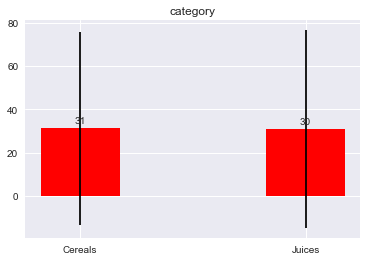

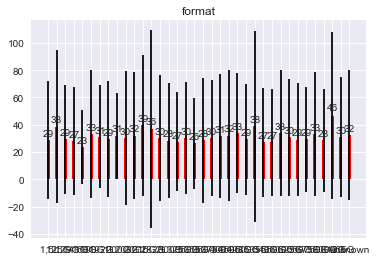

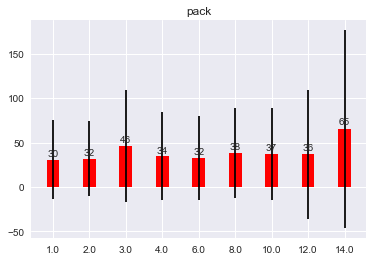

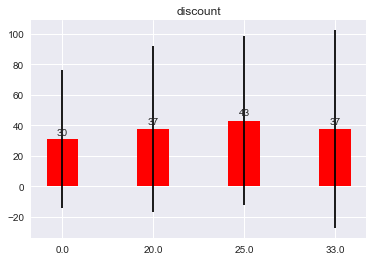

In [44]:
plotter = Plotter(training_table)
for feature in ['category', 'format', 'pack', 'discount']:
    plotter.plot_bar(training_table.groupby([feature]).agg(['mean', 'std'])['label'])

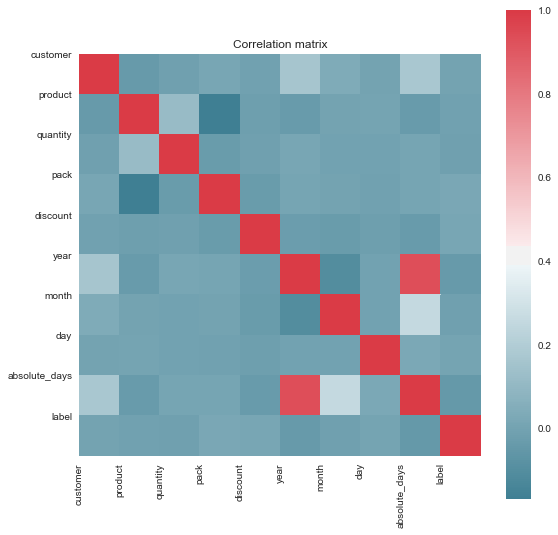

In [45]:
plotter.plot_correlation_matrix()

In [46]:
training_table.corr()

,customer,product,quantity,pack,discount,year,month,day,absolute_days,label
customer,1.000000,-0.040906,-0.012922,0.014580,-0.006224,0.163322,0.038478,0.001459,0.172474,-0.000650
product,-0.040906,1.000000,0.117395,-0.170342,-0.018862,-0.034596,0.000175,0.003456,-0.033459,-0.009667
quantity,-0.012922,0.117395,1.000000,-0.029628,-0.011596,0.013270,-0.005384,-0.002341,0.010886,-0.014374
pack,0.014580,-0.170342,-0.029628,1.000000,-0.032300,0.009061,0.002009,-0.009541,0.009252,0.021496
discount,-0.006224,-0.018862,-0.011596,-0.032300,1.000000,-0.025064,-0.032563,-0.016067,-0.036468,0.013523
year,0.163322,-0.034596,0.013270,0.009061,-0.025064,1.000000,-0.103371,-0.005324,0.934786,-0.041917
month,0.038478,0.000175,-0.005384,0.002009,-0.032563,-0.103371,1.000000,-0.005262,0.255394,-0.013544
day,0.001459,0.003456,-0.002341,-0.009541,-0.016067,-0.005324,-0.005262,1.000000,0.023134,0.003597
absolute_days,0.172474,-0.033459,0.010886,0.009252,-0.036468,0.934786,0.255394,0.023134,1.000000,-0.045489
label,-0.000650,-0.009667,-0.014374,0.021496,0.013523,-0.041917,-0.013544,0.003597,-0.045489,1.000000


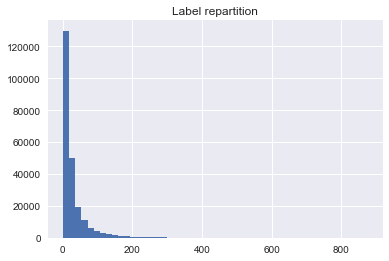

In [47]:
plotter.plot_label_distribution()

# Data aggregation

In [5]:
dataset = pd.read_csv(os.path.join(data_path, 'enhanced_training_table_good_good.csv'), sep = ',' )
data_cleaner = DataCleaner(dataset, 10)
dataset = data_cleaner.setting_preprocessed_training_table()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


data preprocessor loaded.
useless columns were removed.
customer with less than 10 distinct visits were removed.
NaN values were handled.


In [6]:
from data_loader_and_preprocessing import *

aggregater = DataAggregater(dataset)
aggregated_df, labels = aggregater.create_aggregated_dataframe()

The data aggregater was initialized.
The aggregated dataframe per customer and their respective labels (last transaction of a given customer) were computed.


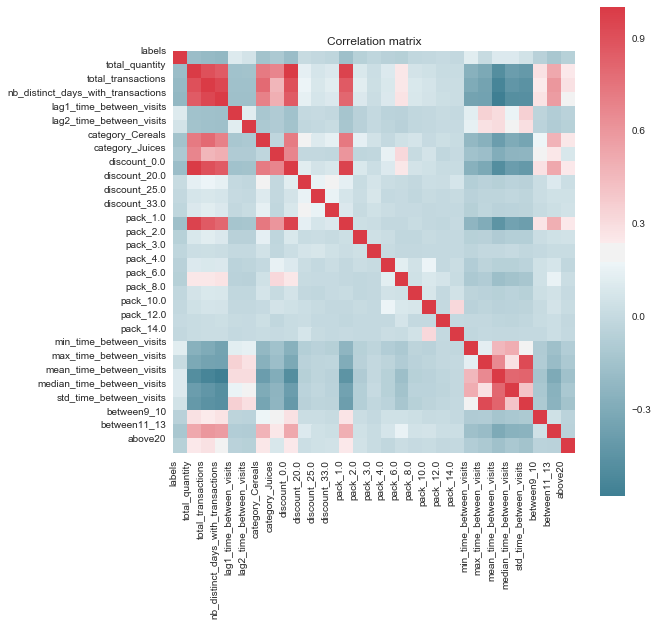

In [7]:
plotter = Plotter(aggregated_df)
plotter.plot_correlation_matrix()

In [8]:
aggregated_df.corr()

,labels,total_quantity,total_transactions,nb_distinct_days_with_transactions,lag1_time_between_visits,lag2_time_between_visits,category_Cereals,category_Juices,discount_0.0,discount_20.0,...,pack_12.0,pack_14.0,min_time_between_visits,max_time_between_visits,mean_time_between_visits,median_time_between_visits,std_time_between_visits,between9_10,between11_13,above20
labels,1.000000,-0.181064,-0.199609,-0.216235,0.104556,0.056480,-0.145342,-0.106809,-0.181562,0.004744,...,0.004290,-0.009836,0.121402,0.007840,0.097707,0.099753,0.050138,-0.051640,-0.123746,-0.061792
total_quantity,-0.181064,1.000000,0.906688,0.856477,-0.150511,-0.143986,0.722356,0.675570,0.999723,0.138561,...,0.012160,0.013554,-0.266201,-0.314858,-0.489455,-0.389957,-0.411743,0.276597,0.525612,0.246239
total_transactions,-0.199609,0.906688,1.000000,0.940537,-0.160770,-0.157838,0.793140,0.465195,0.905301,0.166299,...,0.018499,0.022930,-0.302743,-0.347994,-0.539676,-0.431355,-0.453760,0.245012,0.602121,0.280899
nb_distinct_days_with_transactions,-0.216235,0.856477,0.940537,1.000000,-0.168143,-0.167039,0.696975,0.495133,0.855542,0.145347,...,0.032073,0.021526,-0.350813,-0.355794,-0.582878,-0.478992,-0.472131,0.274090,0.574322,0.234245
lag1_time_between_visits,0.104556,-0.150511,-0.160770,-0.168143,1.000000,0.117890,-0.120478,-0.089147,-0.150814,-0.006324,...,0.006442,-0.004282,0.124779,0.347992,0.302528,0.163051,0.355481,-0.037273,-0.078610,-0.045404
lag2_time_between_visits,0.056480,-0.143986,-0.157838,-0.167039,0.117890,1.000000,-0.109452,-0.091471,-0.144253,-0.014120,...,-0.000402,0.001099,0.141714,0.279427,0.301389,0.208621,0.293211,-0.042069,-0.083229,-0.058689
category_Cereals,-0.145342,0.722356,0.793140,0.696975,-0.120478,-0.109452,1.000000,-0.021854,0.719362,0.199402,...,0.033063,0.014819,-0.215250,-0.261929,-0.389940,-0.303249,-0.337628,0.176603,0.475336,0.255684
category_Juices,-0.106809,0.675570,0.465195,0.495133,-0.089147,-0.091471,-0.021854,1.000000,0.678361,-0.012277,...,-0.017671,0.003796,-0.155360,-0.175935,-0.291874,-0.240456,-0.235297,0.211595,0.253099,0.083389
discount_0.0,-0.181562,0.999723,0.905301,0.855542,-0.150814,-0.144253,0.719362,0.678361,1.000000,0.117487,...,0.011886,0.012342,-0.265013,-0.314669,-0.489342,-0.390106,-0.411615,0.277044,0.524945,0.245897
discount_20.0,0.004744,0.138561,0.166299,0.145347,-0.006324,-0.014120,0.199402,-0.012277,0.117487,1.000000,...,0.019858,0.067116,-0.070616,-0.047314,-0.065575,-0.041848,-0.056661,0.017521,0.103211,0.029002


In [9]:
labels_per_customer = aggregated_df['labels']
customer_to_drop = labels_per_customer[labels_per_customer > 50 ].index
aggregated_df = aggregated_df.drop(customer_to_drop)

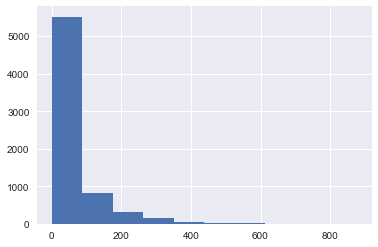

In [11]:
labels_per_customer.hist()

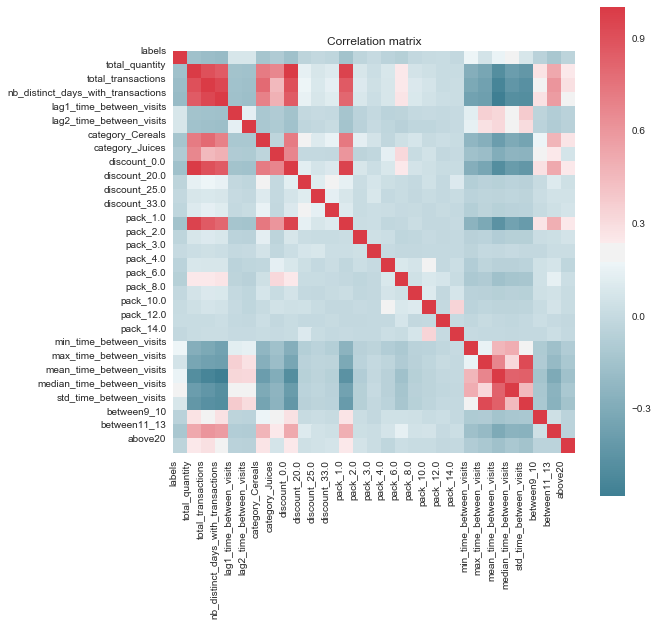

In [12]:
plotter = Plotter(aggregated_df)
plotter.plot_correlation_matrix()

# 2. Models

# Random forest - do not run : a little time-consuming

In [33]:
tuned_parameters = {'n_estimators': [150, 300], 'max_depth': [3, 7, 9, 12], 'min_samples_leaf':[10, 20, 50, 100]}
score = 'neg_mean_squared_error'

y = aggregated_df['labels']
X = aggregated_df.drop('labels', axis = 1)

rf_model = Model(RandomForestRegressor, X, y, n_splits = 5, test_size = 0.2, score = score , tuned_parameters = tuned_parameters)

Modeler initialized.


In [34]:
rf_model.make_train_test_split()

train-test split done, with test size of 0.2


In [35]:
rf_model.cv_for_hyperparameter_search()

Crossvalidation for hyperparameter optimization was done.


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


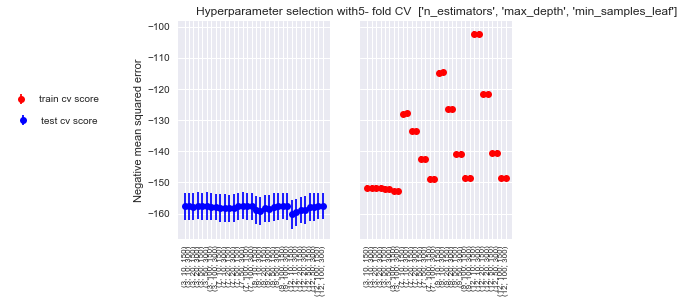

In [36]:
rf_model.plot_crossvalidation_result()

In [37]:
rf_model.fit_and_predict_best_model()
rf_model.get_test_score()

best model was fitted to the test set and predictions were computed.
root mean squared error in train :  11.7385277769
root mean squared error in test : 12.4245535632
mean absolute error in test :  10.4630401496
r2 score in test : 0.0634758969209


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


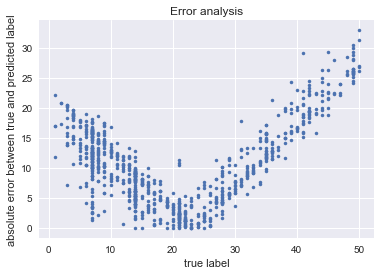

In [38]:
rf_model.plot_error_analysis()

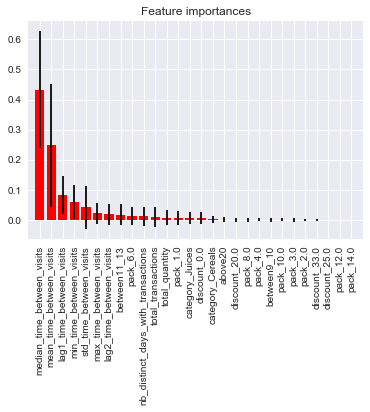

In [39]:
rf_model.plot_feature_importance()

# Linear regression

In [20]:
tuned_parameters = {'alpha' : [100000, 10000, 1000, 100, 25, 10, 1.0, 0.1, 0.01]}

score = 'neg_mean_squared_error'
test_size = 0.2
n_splits = 5

y = aggregated_df['labels']
X = aggregated_df.drop('labels', axis = 1)

RidgeReg = Model(Lasso, X, y, n_splits , test_size , score, tuned_parameters )

Modeler initialized.


In [21]:
RidgeReg.make_train_test_split()

train-test split done, with test size of 0.2
Standard scaling of the data was done.


In [22]:
RidgeReg.cv_for_hyperparameter_search()

Crossvalidation for hyperparameter optimization was done.


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


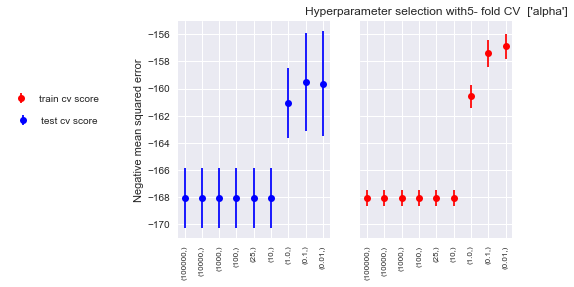

In [23]:
RidgeReg.plot_crossvalidation_result()

In [24]:
RidgeReg.fit_and_predict_best_model()
RidgeReg.get_test_score()

best model was fitted to the test set and predictions were computed.
root mean squared error in train :  12.8375517354
root mean squared error in test : 12.4710962289
mean absolute error in test :  10.4486084202
r2 score in test : 0.0564462729573


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


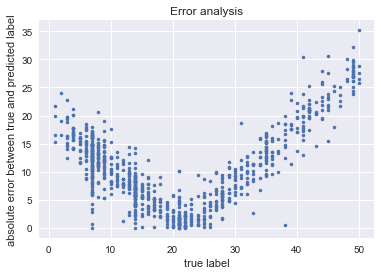

In [25]:
RidgeReg.plot_error_analysis()

# KNN

In [26]:
tuned_parameters = {'n_neighbors' : [i for i in range(5,50, 5)]}

score = 'neg_mean_squared_error'
test_size = 0.2
n_splits = 5

y = aggregated_df['labels']
X = aggregated_df.drop('labels', axis = 1)

knn = Model(KNeighborsRegressor, X, y, n_splits , test_size , score, tuned_parameters )

Modeler initialized.


In [27]:
knn.make_train_test_split()

train-test split done, with test size of 0.2
Standard scaling of the data was done.


In [28]:
knn.cv_for_hyperparameter_search()

Crossvalidation for hyperparameter optimization was done.


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


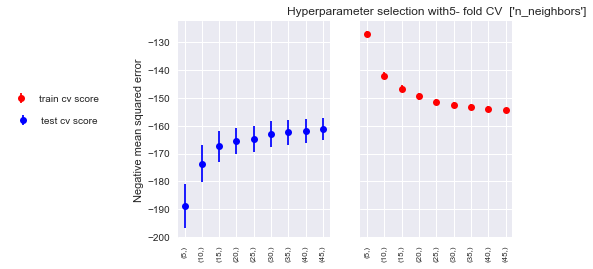

In [29]:
knn.plot_crossvalidation_result()

In [30]:
knn.fit_and_predict_best_model()
knn.get_test_score()

best model was fitted to the test set and predictions were computed.
root mean squared error in train :  12.1580228179
root mean squared error in test : 12.6619497216
mean absolute error in test :  10.6243775548
r2 score in test : 0.0273456282159


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


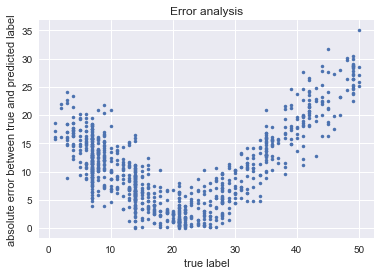

In [31]:
knn.plot_error_analysis()